In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
from Datasets.CASIA2 import CASIA2
from Datasets.Utilities.Maps.Noiseprint.noiseprint import

In [2]:
#Download and prepare the dataset
#This will take a while since we have to process each image singularly to extract the noise features
from Geneartors.CASIA2.Casia2Generator import Casia2Generator
from Models.Customs.BaseClassifier import BaseClassifier
#from Models.Customs.ClassifierType1 import ClassifierType1
from Utilities.Plots import plot_model_data
dataset = CASIA2()
dataset.download_and_prepare()

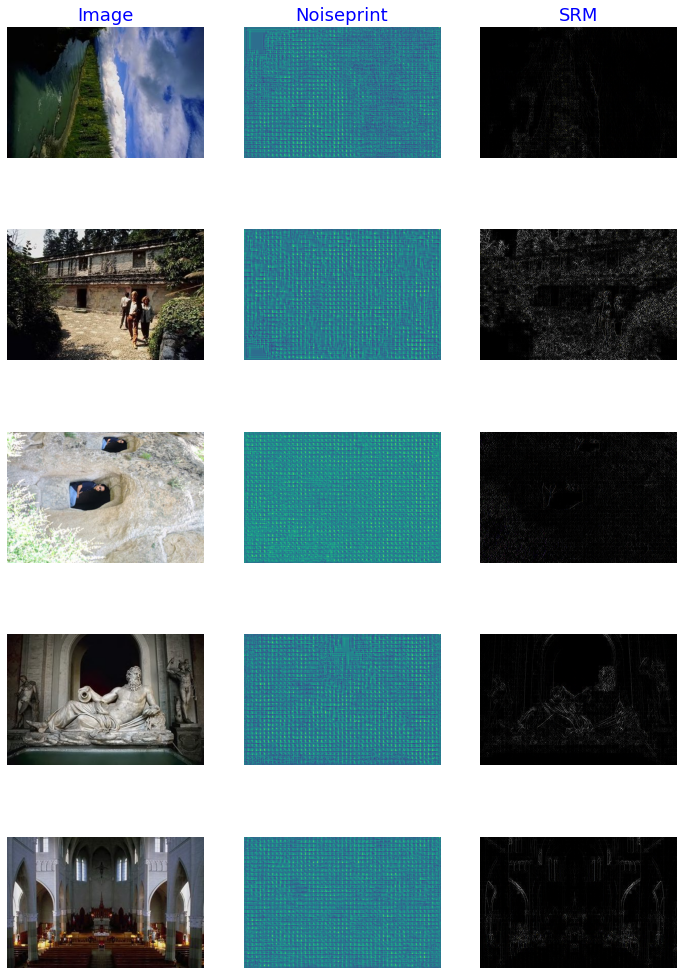

In [3]:
train_split = dataset.as_dataset(split="train")

n_cols = 3

nsamples = 5

samples = train_split.take(nsamples)

col_titles = ['Image','Noiseprint','SRM'] 

nrows = nsamples
ncols = 3

fig, axes = plt.subplots(nrows,ncols,figsize=(12,18))  # create the figure with subplots
[ax.set_axis_off() for ax in axes.ravel()]  # remove the axis

for ax, col in zip(axes[0], col_titles): # set up the title for each column
    ax.set_title(col,fontdict={'fontsize':18,'color':'b'})

i = 0
for sample in samples:
    axes[i,0].imshow(sample["image"])
    axes[i,1].imshow(normalize_noiseprint(sample["noiseprint"].numpy()))
    axes[i,2].imshow(sample["SRM"])   
    i = i + 1 
      

In [4]:
#Define parameters essentials for the training of the models

#Define input parameters
input_shape_rgb = (256, 384, 3)
input_shape_rbf = (256, 384, 3)
input_shape_noiseprint = (256, 384, 1)

#We just have to distinguish between tampered and pristine images
#and a single class is enough for that
output_classes = 1

#Define the loss the models will use
loss_function = "binary_crossentropy"

#Define the number of epochs each model has to be trained for
epochs = 1

#define the size of each training batch
batch_size = 32

In [5]:
#Define additional parameters not essentials for the training

#Set the path to the Log folder in which the logs, the checkpoints and other usefull
#data will be used
logs_folder = Path("../Logs")

#Set verbose = True if you want an extensive printing of logs during the training
# and testing of the models
verbose = True

In [6]:
# Create 2 generator of datas that has that provide samples with the following structure:
#   X -> [RGB image]
#   Y -> class of the image
# The first generator will produce training data, the second will produce validation data

generator_training_rgb = Casia2Generator(dataset.as_dataset(split="train"),["rgb"],batch_size)
generator_validation_rgb = Casia2Generator(dataset.as_dataset(split="validation"),["rgb"],batch_size)
#Train a Resnet Classifier using the RGB data
model_rgb = BaseClassifier(input_shape_rgb,output_classes,"RGB model",logs_folder,verbose)
history_rgb , rgb_model_path, rgb_checkpoint_path = model_rgb.train_model(generator_training_rgb,generator_validation_rgb,epochs,loss_function,save_model=True)

Model structure:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 384, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 192, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 192, 16)      4624      
_________________________________________________________________
activation (Activation)      (None, 128, 192, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 128, 192, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 96, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64,

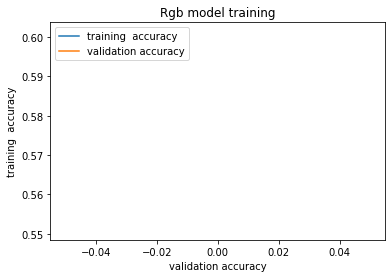

In [7]:
plot_model_data(history_rgb,("accuracy","val_accuracy"),("training  accuracy","validation accuracy"),"Rgb model training")

NameError: name 'sleep' is not defined

In [ ]:
# Create 2 generator of datas that has that provide samples with the following structure:
#   X -> [Noiseprint image]
#   Y -> class of the image
# The first generator will produce training data, the second will produce validation data

generator_training = Casia2Generator(dataset.as_dataset(split="train"),["noiseprint"],batch_size)
generator_validation = Casia2Generator(dataset.as_dataset(split="validation"),["noiseprint"],batch_size)

#Train a Resnet Classifier using the Noiseprint data
model_noiseprint = BaseClassifier(input_shape_noiseprint,output_classes,"Noiseprint model",logs_folder,verbose)
history_noiseprint , noiseprint_model_path,noiseprint_checkpoint_path =  model_noiseprint.train_model(generator_training,generator_validation,epochs,loss_function,save_model=True)

In [ ]:
plot_model_data(history_noiseprint,("accuracy","val_accuracy"),("training  accuracy","validation accuracy"),"Rgb model training")